(338, 250)


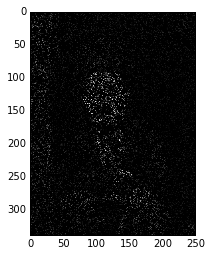

In [1]:
import imageio
import numpy as np

image  = imageio.imread('cc_90.png')
print(image.shape)

import matplotlib.pyplot as plt
%matplotlib inline  

plt.gray()
plt.imshow(image)
plt.show()

In [7]:
#create training data set
X_all = np.indices(image.shape).reshape((2,-1)).T
Y_all = image.flatten()

X = X_all[Y_all!=0]
Y = Y_all[Y_all!=0]

X_new = X_all[X_all==0]


print(X.shape, Y.shape, X_all.shape)

(8450, 2) (8450,) (84500, 2)


In [8]:
import scipy.sparse as sp

def K(U, W, sigma, r_max):
    '''U is a N´xd matrix and W a Nxd matrix'''
    d2 = np.sum(np.square(np.expand_dims(U,axis=0)-np.expand_dims(W, axis=1)), axis=2)
    ind = np.argwhere(d2<r_max**2)
    i = ind[:,0]
    j = ind[:,1]
    K = np.exp(-d2[i,j]/(2*sigma**2)).flatten()
    return sp.coo_matrix((K, (i, j)), shape=(len(W),len(U)), dtype = np.float32)

print(K(np.array([[2,1],[5,4]]), np.array([[4,8],[5,6], [6,7]]), 10, 100))

  (0, 0)	0.767206
  (0, 1)	0.918512
  (1, 0)	0.843665
  (1, 1)	0.980199
  (2, 0)	0.771052
  (2, 1)	0.951229


In [35]:
import scipy.sparse.linalg
from IPython.display import clear_output

def pred(X, Y, X_new, tau, sigma, r_max):
    G = K(X, X, sigma, r_max)
    a = scipy.sparse.linalg.spsolve(sp.csc_matrix(G)+sp.csc_matrix(tau*np.identity(len(X))), Y)
    Y_new = []
    m = 0
    for i in range(len(X_new)):
        k = K(X, np.expand_dims(X_new[i], axis=0), sigma, r_max)
        Y_new.append(sp.csc_matrix(k)*a)
        if(i/len(X_new)-0.05>m):
            m = i/len(X_new)
            clear_output()
            print(str(m)+"%")
    return np.array(Y_new)

In [36]:
%time  Y_new = [pred(X,Y,X_missing, 0.1, s, 30*s) for s in [4]]

0.9501249178172255%
CPU times: user 2min 24s, sys: 2.43 s, total: 2min 26s
Wall time: 2min 31s


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  from ipykernel import kernelapp as app


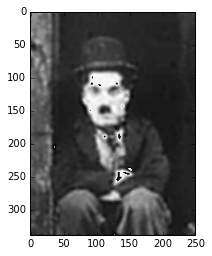

In [37]:
Im = image.flatten()
Im[Im==0] = Y_new
Im = np.reshape(Im, image.shape)

#print((Y_new[0]==Y_new[3]).all())

for y in Y_new:
    plt.gray()
    plt.imshow(Im)
    plt.show()